#  Task 2 - Data Cleaning and EDA

## Step-1: Import the libraries 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Step-2: Load the dataset from the CSV file

In [4]:
df = pd.read_csv('train.csv')

## Step-3: Initial Inspection

In [6]:
# 1. Look at the first 5 rows
print("--- First 5 Rows ---")
print(df.head())
print("\n" + "="*30 + "\n")

--- First 5 Rows ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.050

In [7]:
# 2. Get a summary of the columns, data types, and missing values
print("--- Dataset Info ---")
df.info()
print("\n" + "="*30 + "\n")

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB




In [8]:
# 3. Get statistical details for numerical columns
print("--- Statistical Summary ---")
print(df.describe())

--- Statistical Summary ---
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## Step 4: Data Cleaning - Handling Missing 'Age' Values

In [9]:
# Calculate the mean age, ignoring the empty values
mean_age = df['Age'].mean()

print(f"The mean age is: {mean_age:.2f}")

# Fill the missing values in the 'Age' column with the mean age
# `inplace=True` modifies the DataFrame directly
df['Age'].fillna(mean_age, inplace=True)

# Let's run .info() again to confirm that 'Age' now has 891 non-null entries
print("\n--- Dataset Info After Cleaning 'Age' ---")
df.info()

The mean age is: 29.70

--- Dataset Info After Cleaning 'Age' ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Step 5: Visual Analysis - Finding Patterns

Question 1: Did your gender affect your chance of survival?
This is one of the most famous patterns in this dataset. We can use a countplot to see the survival numbers split by gender.

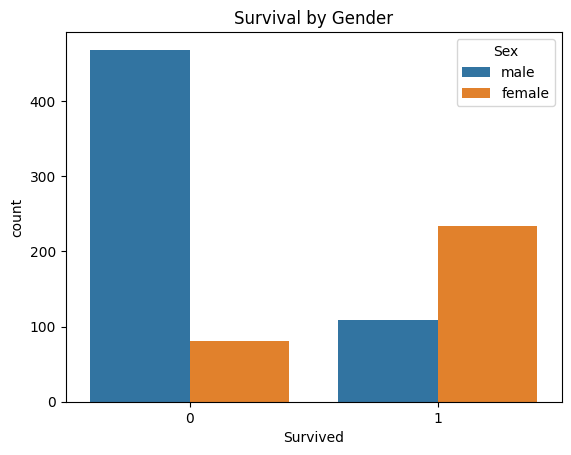

In [11]:
# Create a count plot to compare survival rates between genders
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Gender')
plt.show()

Question 2: Did your ticket class affect your chance of survival?
Did richer passengers in 1st class have a better outcome than those in 3rd class?

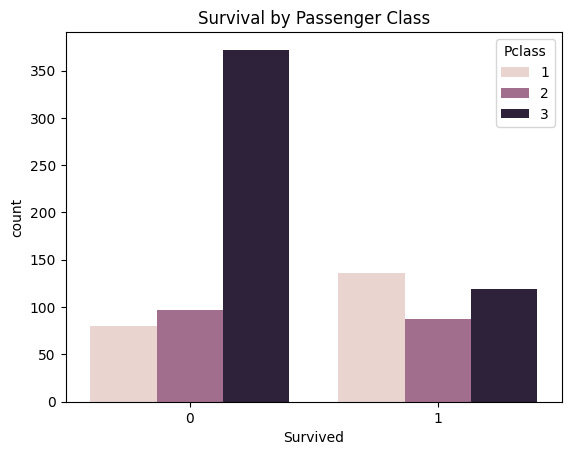

In [12]:
# Create a count plot to compare survival rates across passenger classes
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Passenger Class')
plt.show()

Question 3: How did age affect survival?
Were children more likely to be saved? We can visualize the age distribution for survivors and non-survivors.

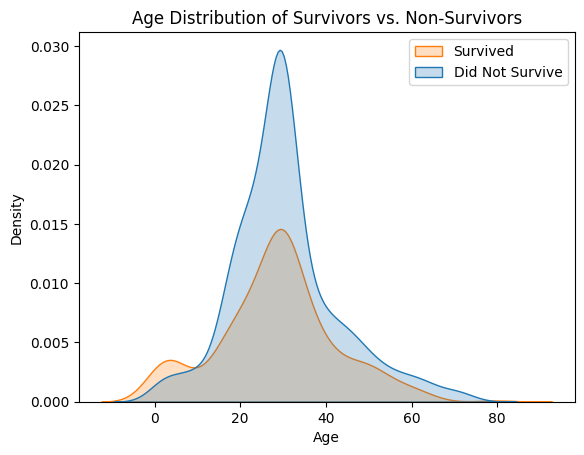

In [13]:
# Create a plot to see the distribution of ages for survivors vs. non-survivors
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True)
plt.title('Age Distribution of Survivors vs. Non-Survivors')
plt.legend(['Survived', 'Did Not Survive']) # Corrected legend labels
plt.show()